In [9]:
import cv2
import numpy as np
import mediapipe as mp
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
import time
import pyautogui

In [2]:
photo_data = pd.read_csv('./flp/photo_data001.csv', header=None).to_numpy()

In [3]:
photo_data.shape

(1337, 100)

In [20]:
photo_data[:10]

[[0.6133146286010742,
  0.1862522661685943,
  -0.3154697716236114,
  0.6228442192077637,
  0.170939028263092,
  -0.2810400724411011,
  0.6306759715080261,
  0.1714946627616882,
  -0.281451404094696,
  0.6362963318824768,
  0.1724650263786316,
  -0.2813984453678131,
  0.6047825217247009,
  0.171585738658905,
  -0.2863787114620209,
  0.5997264385223389,
  0.1718934476375579,
  -0.2869284152984619,
  0.5930122137069702,
  0.1715490520000457,
  -0.2871992290019989,
  0.6411547660827637,
  0.1809440851211547,
  -0.0918427631258964,
  0.585430383682251,
  0.1752709448337555,
  -0.1136168092489242,
  0.6238754391670227,
  0.2038396298885345,
  -0.2403852790594101,
  0.6045317649841309,
  0.2008527815341949,
  -0.2499179095029831,
  0.6771779656410217,
  0.2965333461761474,
  0.0297822095453739,
  0.5249595642089844,
  0.2584994435310364,
  -0.0177068971097469,
  0.6807117462158203,
  0.4175840616226196,
  0.0547040067613124,
  0.4802702367305755,
  0.37674081325531,
  -0.0529608316719532,
  0

In [4]:
len(photo_data)
photo_data = photo_data.tolist()

In [5]:
x = []
y = []
for i in tqdm(photo_data):
    x.append(i[:99])
    y.append([i[99]])

  0%|          | 0/1337 [00:00<?, ?it/s]

In [6]:
len(photo_data[1])
photo_data[1][99]

0.754157993021982

In [7]:
y[:1]

[[0.754157993021982]]

In [10]:
train_data, test_data, train_targets, test_targets = train_test_split(x, y, 
                                                      test_size=0.2, 
                                                      shuffle=True, 
                                                      stratify=y, 
                                                      random_state=42)

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=99)
# pca.fit(x_t)
# x_train = pca.transform(x_t)
# x_valid = pca.transform(x_v)

In [11]:
import numpy as np

# 데이터셋 생성
train_data = np.array(train_data)
train_targets = np.array(train_targets)
test_data = np.array(test_data)
test_targets = np.array(test_targets)

print(train_data.shape)
print(train_targets.shape)

(1069, 99)
(1069, 1)


In [23]:
print(test_data.shape)

(268, 99)


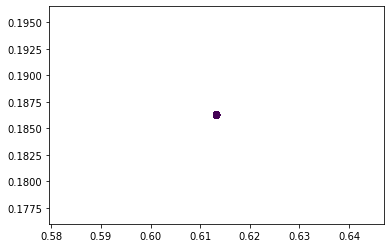

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# 데이터셋 확인 (2차원)
plot_x = train_data[:,0]
plot_y = train_data[:,1]
plot_color = train_targets.reshape(train_data.shape[0],)

plt.scatter(plot_x, plot_y, c=plot_color)
plt.show()

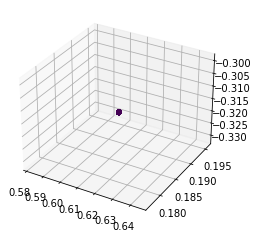

In [14]:
# 데이터셋 확인 (3차원)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_x = train_data[:,0]
plot_y = train_data[:,1]
plot_z = train_data[:,2]
plot_color = train_targets.reshape(train_data.shape[0],)

ax.scatter(plot_x, plot_y, plot_z, c=plot_color)
plt.show()

In [17]:
from keras import models
from keras import layers

def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [29]:
k = 2

num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]  # 검증 데이터 준비: k번째 분할
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(  # 훈련 데이터 준비: 다른 분할 전체
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()  # 케라스 모델 구성(컴파일 포함)
    model.fit(partial_train_data, partial_train_targets,  # 모델 훈련(verbose=0이므로 훈련 과정이 출력되지 않습니다.)
              epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)  # 검증 세트로 모델 평가
    all_scores.append(val_mae)

처리중인 폴드 # 0
Epoch 1/10
535/535 [==============================] - 1s 1ms/step - loss: 0.0043 - mae: 0.0550
Epoch 2/10
535/535 [==============================] - 1s 999us/step - loss: 9.6007e-04 - mae: 0.0307
Epoch 3/10
535/535 [==============================] - 1s 974us/step - loss: 7.1606e-04 - mae: 0.0267
Epoch 4/10
535/535 [==============================] - 1s 1ms/step - loss: 5.5787e-04 - mae: 0.0235
Epoch 5/10
535/535 [==============================] - 1s 1ms/step - loss: 4.5825e-04 - mae: 0.0214
Epoch 6/10
535/535 [==============================] - 1s 980us/step - loss: 4.0055e-04 - mae: 0.0200
Epoch 7/10
535/535 [==============================] - 1s 974us/step - loss: 3.5018e-04 - mae: 0.0186
Epoch 8/10
535/535 [==============================] - 1s 989us/step - loss: 3.0360e-04 - mae: 0.0174
Epoch 9/10
535/535 [==============================] - 1s 973us/step - loss: 2.6282e-04 - mae: 0.0162
Epoch 10/10
535/535 [==============================] - 1s 991us/step - loss: 2.3785e-04 -

In [31]:
num_epochs = 30
all_mae_histories = []
for i in tqdm(range(k)):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]  #검증 데이터 준비: k번째 분할    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(  # 훈련 데이터 준비: 다른 분할 전체
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()  # 케라스 모델 구성(컴파일 포함)
    history = model.fit(partial_train_data, partial_train_targets,  # 모델 훈련(verbose=0이므로 훈련 과정이 출력되지 않습니다.)
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

  0%|          | 0/2 [00:00<?, ?it/s]

처리중인 폴드 # 0
처리중인 폴드 # 1


In [32]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

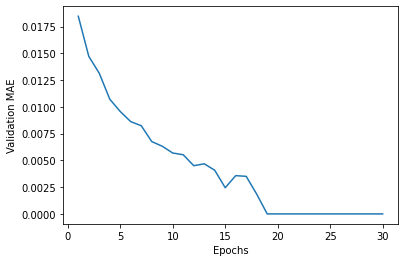

In [33]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

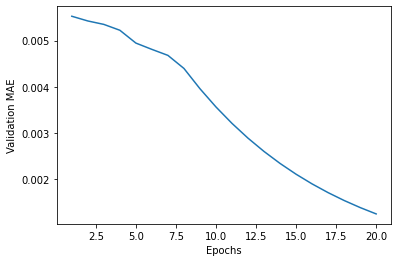

In [34]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [35]:
model = build_model()  # 새롭게 컴파일된 모델을 얻습니다.
model.fit(train_data, train_targets,  # 전체 데이터로 훈련시킵니다.
          epochs=15, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

9/9 [==============================] - 0s 1ms/step - loss: 6.7058e-04 - mae: 0.0259


In [37]:
test_mse_score
test_mae_score

0.025895655155181885

In [42]:
print(model.predict([photo_data[0][:99]]))

print(photo_data[0][99])

1/1 [==============================] - 0s 28ms/step
[[0.7282623]]
0.754157993021982


In [18]:
def getp(data):
    p = model.predict(data)[0][0]
    p = int(p*10000)
    p = float(p)/100
    return p

In [20]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
count=0
BG_COLOR = (0, 0, 0) # gray
MASK_COLOR = (1, 1, 1) # white

cap = cv2.VideoCapture('./test02.mp4')

prev_time = 0
FPS = 10

# while True:

#     ret, frame = video.read()
    
#     current_time = time.time() - prev_time

#     if (ret is True) and (current_time > 1./ FPS) :
    	
#         prev_time = time.time()
        
#         cv2.imshow('VideoCapture', frame)
    	
#         if cv2.waitKey(1) > 0 :
            
#             break
idx=0
datacompare = 0
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        idx+=1
#         time.sleep(0.001)
#         pyautogui.PAUSE = 1    # 딜레이 관련 (default = 0.1 초)
        pyautogui.FAILSAFE = False  # 강제 초기화 비활성
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
    # If loading a video, use 'break' instead of 'continue'.
            break

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = holistic.process(image)
        
        n=[]
        visibility =[]
        if results.pose_landmarks:
            for data_point in results.pose_landmarks.landmark:
                n.append(data_point.x)
                n.append(data_point.y)
                n.append(data_point.z)
                visibility.append(data_point.visibility)
        else:
            for _ in range(99):
                n.append(0)

        nowdata = [n]
        
        if datacompare ==0:
            predata = [[0 for _ in range(99)]]
        
        datacompare +=1
        
        #프레임간 좌표이동값
        xyzd = 0
        for i in range(99):
            xyzd += (nowdata[0][i]-predata[0][i])**2
        print("변한 거리 : {:0>4}".format(xyzd))
#         print(len(n))
        life_probability = getp(nowdata)
        predata = nowdata
        text="probability : {}".format(round(life_probability,2))
        org=(30,30)
        font=cv2.FONT_HERSHEY_SIMPLEX
 
    # Draw landmark annotation on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        save_image = image.copy()
#         mp_drawing.draw_landmarks(
#             image,
#             results.face_landmarks,
#             mp_holistic.FACEMESH_CONTOURS,
#             landmark_drawing_spec=None,
#             connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

        if life_probability>80 and xyzd<0.002:
            cv2.imwrite('./flp/test002/best_image{:0>4}'.format(idx)+'.png', save_image)
#         image = cv2.flip(image, 1)
        cv2.putText(image,text,org,font,1,(255,0,0),2)
    # Flip the image horizontally for a selfie-view display.
        cv2.imshow('MediaPipe Holistic', image)
        if cv2.waitKey(1) & 0xFF == 27:
#         if cv2.waitKey(5)==27:
            break
        
cv2.destroyAllWindows()
cap.release()


변한 거리 : 17.548927546362396
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0.02732636733018965
1/1 [==============================] - 0s 28ms/step
변한 거리 : 0.00012954629124020678
1/1 [==============================] - 0s 30ms/step
변한 거리 : 0.0004383417669212332
1/1 [==============================] - 0s 26ms/step
변한 거리 : 0.00047108723841938344
1/1 [==============================] - 0s 34ms/step
변한 거리 : 0.00041444576223544864
1/1 [==============================] - 0s 28ms/step
변한 거리 : 0.0002191334596485005
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0.0001113978889624534
1/1 [==============================] - 0s 25ms/step
변한 거리 : 6.364451382601393e-05
1/1 [==============================] - 0s 26ms/step
변한 거리 : 4.56168434513249e-05
1/1 [==============================] - 0s 30ms/step
변한 거리 : 2.3292981492461584e-05
1/1 [==============================] - 0s 31ms/step
변한 거리 : 1.9913092527029533e-05
1/1 [==============================] - 0s 28ms/step
변한 거리 : 3.6588628

1/1 [==============================] - 0s 27ms/step
변한 거리 : 0.002654413695579199
1/1 [==============================] - 0s 51ms/step
변한 거리 : 0.0001928728323934044
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0.0001420962564111089
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0.0007867199490467199
1/1 [==============================] - 0s 30ms/step
변한 거리 : 0.0007327525556147497
1/1 [==============================] - 0s 27ms/step
변한 거리 : 0.0005418860088385638
1/1 [==============================] - 0s 28ms/step
변한 거리 : 0.0002864603952710711
1/1 [==============================] - 0s 43ms/step
변한 거리 : 0.0007947092393403235
1/1 [==============================] - 0s 29ms/step
변한 거리 : 8.02560300779151e-05
1/1 [==============================] - 0s 31ms/step
변한 거리 : 0.00017996928378287967
1/1 [==============================] - 0s 30ms/step
변한 거리 : 7.887634834387162e-05
1/1 [==============================] - 0s 120ms/step
변한 거리 : 0.00012297893570482242
1/1 [==========

1/1 [==============================] - 0s 48ms/step
변한 거리 : 0.010665984657124906
1/1 [==============================] - 0s 38ms/step
변한 거리 : 0.004723581187351918
1/1 [==============================] - 0s 37ms/step
변한 거리 : 0.005131589730455327
1/1 [==============================] - 0s 112ms/step
변한 거리 : 0.011615209840348077
1/1 [==============================] - 0s 44ms/step
변한 거리 : 0.0026361456572221885
1/1 [==============================] - 0s 39ms/step
변한 거리 : 0.014975892386910248
1/1 [==============================] - 0s 33ms/step
변한 거리 : 0.0566679923857169
1/1 [==============================] - 0s 33ms/step
변한 거리 : 0.007303712937395808
1/1 [==============================] - 0s 31ms/step
변한 거리 : 0.008172728594333633
1/1 [==============================] - 0s 32ms/step
변한 거리 : 0.00704789502307871
1/1 [==============================] - 0s 33ms/step
변한 거리 : 0.0005482447345297248
1/1 [==============================] - 0s 39ms/step
변한 거리 : 0.013694994246715084
1/1 [=======================

1/1 [==============================] - 0s 35ms/step
변한 거리 : 0.002035697415179216
1/1 [==============================] - 0s 33ms/step
변한 거리 : 0.005238157167887372
1/1 [==============================] - 0s 34ms/step
변한 거리 : 0.008438752513363647
1/1 [==============================] - 0s 35ms/step
변한 거리 : 0.0039783268328969015
1/1 [==============================] - 0s 32ms/step
변한 거리 : 0.005678146960495392
1/1 [==============================] - 0s 34ms/step
변한 거리 : 0.002195606667254389
1/1 [==============================] - 0s 33ms/step
변한 거리 : 0.0019154025028339107
1/1 [==============================] - 0s 33ms/step
변한 거리 : 0.0017349215943903485
1/1 [==============================] - 0s 30ms/step
변한 거리 : 0.00928972935821931
1/1 [==============================] - 0s 58ms/step
변한 거리 : 0.011697074058822216
1/1 [==============================] - 0s 51ms/step
변한 거리 : 0.01983063303935484
1/1 [==============================] - 0s 38ms/step
변한 거리 : 0.009252598848259883
1/1 [======================

1/1 [==============================] - 0s 32ms/step
변한 거리 : 0.8341583166266646
1/1 [==============================] - 0s 31ms/step
변한 거리 : 0.04335840299484834
1/1 [==============================] - 0s 31ms/step
변한 거리 : 0.2585446025871368
1/1 [==============================] - 0s 31ms/step
변한 거리 : 0.14880551433456463
1/1 [==============================] - 0s 31ms/step
변한 거리 : 0.026377720210410197
1/1 [==============================] - 0s 30ms/step
변한 거리 : 0.08857122846450755
1/1 [==============================] - 0s 30ms/step
변한 거리 : 4.825441842455683
1/1 [==============================] - 0s 30ms/step
변한 거리 : 1.1413615680353089
1/1 [==============================] - 0s 31ms/step
변한 거리 : 10.64288029049602
1/1 [==============================] - 0s 31ms/step
변한 거리 : 5.833499541566729
1/1 [==============================] - 0s 29ms/step
변한 거리 : 1.8304846323753974
1/1 [==============================] - 0s 31ms/step
변한 거리 : 0.42686776995210735
1/1 [==============================] - 0s 30ms/st

변한 거리 : 0.19345411984524458
1/1 [==============================] - 0s 32ms/step
변한 거리 : 6.401249005525658
1/1 [==============================] - 0s 32ms/step
변한 거리 : 3.284381186477549
1/1 [==============================] - 0s 43ms/step
변한 거리 : 3.0306526312770563
1/1 [==============================] - 0s 35ms/step
변한 거리 : 1.356704347694025
1/1 [==============================] - 0s 32ms/step
변한 거리 : 2.536799720630964
1/1 [==============================] - 0s 33ms/step
변한 거리 : 2.8109411775297866
1/1 [==============================] - 0s 32ms/step
변한 거리 : 3.756941670051389
1/1 [==============================] - 0s 32ms/step
변한 거리 : 0.313758755961998
1/1 [==============================] - 0s 35ms/step
변한 거리 : 0.7083383956897732
1/1 [==============================] - 0s 33ms/step
변한 거리 : 1.6121676547189643
1/1 [==============================] - 0s 33ms/step
변한 거리 : 3.2907238192384645
1/1 [==============================] - 0s 36ms/step
변한 거리 : 1.143053299871711
1/1 [==========================

1/1 [==============================] - 0s 30ms/step
변한 거리 : 0.012640699134457601
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0.0015245066510792547
1/1 [==============================] - 0s 30ms/step
변한 거리 : 0.004632764573533493
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0.008266085427641564
1/1 [==============================] - 0s 30ms/step
변한 거리 : 0.0009785090827654256
1/1 [==============================] - 0s 31ms/step
변한 거리 : 0.01229791252387271
1/1 [==============================] - 0s 33ms/step
변한 거리 : 0.022728458977254194
1/1 [==============================] - 0s 32ms/step
변한 거리 : 0.002292911606443308
1/1 [==============================] - 0s 34ms/step
변한 거리 : 0.0076923557638712255
1/1 [==============================] - 0s 40ms/step
변한 거리 : 0.001394983433615573
1/1 [==============================] - 0s 35ms/step
변한 거리 : 0.00450879138286308
1/1 [==============================] - 0s 35ms/step
변한 거리 : 0.004875170068003917
1/1 [======================

1/1 [==============================] - 0s 36ms/step
변한 거리 : 0.08115380713154446
1/1 [==============================] - 0s 34ms/step
변한 거리 : 0.08285307790830246
1/1 [==============================] - 0s 33ms/step
변한 거리 : 0.17503440012689725
1/1 [==============================] - 0s 44ms/step
변한 거리 : 0.09162201668567674
1/1 [==============================] - 0s 35ms/step
변한 거리 : 0.30253041793688734
1/1 [==============================] - 0s 37ms/step
변한 거리 : 0.4342170242590905
1/1 [==============================] - 0s 32ms/step
변한 거리 : 0.05197403211331368
1/1 [==============================] - 0s 32ms/step
변한 거리 : 1.4293291506023422
1/1 [==============================] - 0s 30ms/step
변한 거리 : 0.09726062850732028
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0.23141745020850712
1/1 [==============================] - 0s 30ms/step
변한 거리 : 0.4827700360214247
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0.15384741183938216
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 30ms/step
변한 거리 : 0000
1/1 [==============================] - 0s 30ms/step
변한 거리 : 0000
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0000
1/1 [==============================] - 0s 30ms/step
변한 거리 : 0000
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0000
1/1 [==============================] - 0s 31ms/step
변한 거리 : 0000
1/1 [==============================] - 0s 30ms/step
변한 거리 : 0000
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0000
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0000
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0000
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0000
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0000
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0000
1/1 [==============================] - 0s 29ms/step
변한 거리 : 0000
1/1 [==============================] - 0s 31ms/step
변한 거리 : 0000
1/1 [====================

In [ ]:
print(model.predict(nowdata)[0][0])

In [ ]:
mp_drawing.plot_landmarks(results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)


In [ ]:
getp(nowdata)